In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## check for null values

In [4]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

## 1) Replace the NaN values with correct value.

In [5]:
dataset["salary"].fillna(0,inplace=True)

In [6]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


#### the person who is not placed have got no salary so we replace it with 0

In [7]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

## 2) How many of them are not placed?

In [8]:
Not_Placed=dataset[dataset["status"]=='Not Placed'].shape[0]

In [9]:
print("No.of students have Not Placed: ",Not_Placed)

No.of students have Not Placed:  67


## 3) Find the reason for non placement from the dataset?

In [10]:
import scipy.stats as stats
for subject in ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']:
    placed_marks = dataset[dataset['status'] == 'Placed'][subject]
    not_placed_marks = dataset[dataset['status'] == 'Not Placed'][subject]
    t_stat, p_value = stats.ttest_ind(placed_marks, not_placed_marks)
    print(f"T-test for {subject}:")
    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_value}")

T-test for ssc_p:
t-statistic: 11.173294337111484
p-value: 4.115201043884403e-23
T-test for hsc_p:
t-statistic: 8.230746477379519
p-value: 1.849212756931434e-14
T-test for degree_p:
t-statistic: 7.982429212839097
p-value: 8.807682138862608e-14
T-test for etest_p:
t-statistic: 1.8781977946559039
p-value: 0.061720381110174166
T-test for mba_p:
t-statistic: 1.1259706009659818
p-value: 0.26144500197748627


#### The t-tests compare the mean scores of "Placed" and "Not Placed" candidates in each of the academic subjects (ssc_p, hsc_p, degree_p, etest_p, mba_p).

#### ssc_p, hsc_p, degree_p: The p-values for these subjects are very low (close to 0). This indicates that there is a statistically significant difference in the mean scores between "Placed" and "Not Placed" candidates in these subjects. Specifically, "Placed" candidates tend to have significantly higher scores in these academic metrics.

#### Low Academic Performance: The significant differences in ssc_p, hsc_p, and degree_p suggest that lower scores in these academic metrics are likely contributing factors to non-placement. Candidates with strong academic backgrounds might have a higher chance of being placed.

## 4) What kind of relation between salary and mba_p

In [11]:
import numpy as np
numeric_data= dataset.select_dtypes(include=[np.number])
numeric_data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


#### The positive value of the correlation coefficient indicates a positive relationship between salary and mba_p. This means that, in general, candidates with higher MBA scores tend to have higher salaries.

## 5) Which specialization is getting minimum salary?

In [12]:
grouped_data = dataset.groupby("specialisation")["salary"].mean()

In [13]:
grouped_data

specialisation
Mkt&Fin    236591.666667
Mkt&HR     150842.105263
Name: salary, dtype: float64

In [14]:
min_salary_specialization = grouped_data.idxmin()
min_salary = grouped_data.min()

In [15]:
min_salary_specialization

'Mkt&HR'

In [16]:
min_salary

150842.1052631579

## 6) How many of them getting above 500000 salary?

In [17]:
high_salary_count = len(dataset[dataset['salary'] > 500000])
print(f"Number of people getting above 500000 salary: {high_salary_count}")

Number of people getting above 500000 salary: 3


### 7) Test the Analysis of Variance between etest_p and mba_p at signifancelevel 5%.(Make decision using      Hypothesis Testing)

In [18]:
import scipy.stats as stats
f_statistic, p_value = stats.f_oneway(dataset['etest_p'], dataset['mba_p'])
f_statistic, p_value

(98.64487057324706, 4.672547689133573e-21)

In [19]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of etest_p and mba_p.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of etest_p and mba_p.")

Reject the null hypothesis: There is a significant difference between the means of etest_p and mba_p.


#### f_statistic = 98.64487057324706
#### p_value = 4.672547689133573e-21
#### Since the p_value (4.672547689133573e-21) is much smaller than the significance level (alpha = 0.05), we reject the null hypothesis. This means there is strong evidence to conclude that there is a statistically significant difference between the means of etest_p and mba_p.

### 8) Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)

In [20]:
import scipy.stats as stats
import pandas as pd
sci_tech_salaries = dataset[dataset['degree_t'] == 'Sci&Tech']['salary']
mkt_hr_salaries = dataset[dataset['specialisation'] == 'Mkt&HR']['salary']

t_stat, p_value = stats.ttest_ind(sci_tech_salaries, mkt_hr_salaries)

a = 0.05

if p_value < a:
    print("Reject the null hypothesis: There is a significant difference in salaries between Sci&Tech and Mkt&HR.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in salaries between Sci&Tech and Mkt&HR.")

Reject the null hypothesis: There is a significant difference in salaries between Sci&Tech and Mkt&HR.


#### This indicates that the t-test found a statistically significant difference in the mean salaries between individuals with a degree_t of "Sci&Tech" and those with a specialisation of "Mkt&HR".

### 9) Convert the normal distribution to standard normal distribution for salary column

In [21]:
import pandas as pd

min_salary = dataset['salary'].min()
max_salary = dataset['salary'].max()

dd=dataset['normalized_salary'] = (dataset['salary'] - min_salary) / (max_salary - min_salary)

In [22]:
dd

0      0.287234
1      0.212766
2      0.265957
3      0.000000
4      0.452128
         ...   
210    0.425532
211    0.292553
212    0.313830
213    0.217021
214    0.000000
Name: salary, Length: 215, dtype: float64

In [23]:
def stdNBgraph(dataset):
       
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.displot(z_score,kde=True)

    sum(z_score)/len(z_score)
   

C:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


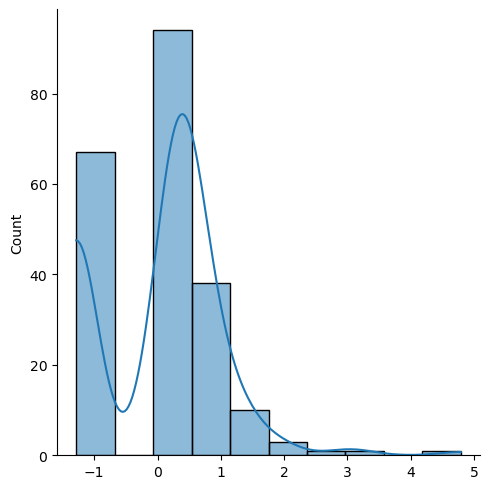

In [24]:
stdNBgraph(dataset['salary'])

### 10) What is the probability Density Function of the salary range from 700000 to 900000?

In [25]:
import seaborn as sns

C:\Users\s\AppData\Local\Temp\ipykernel_8352\492941456.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['salary'])


<Axes: xlabel='salary', ylabel='Density'>

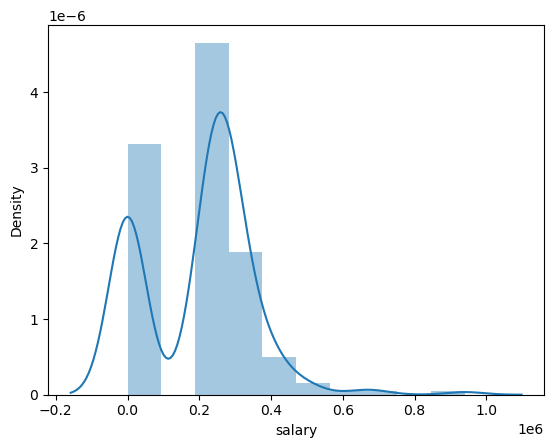

In [26]:
sns.distplot(dataset['salary'])

In [27]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

C:\Users\s\AppData\Local\Temp\ipykernel_8352\2842244316.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=198702.326, Standard Deviation=154780.927
The area between range(700000,900000):0.0005973310593974901


0.0005973310593974901

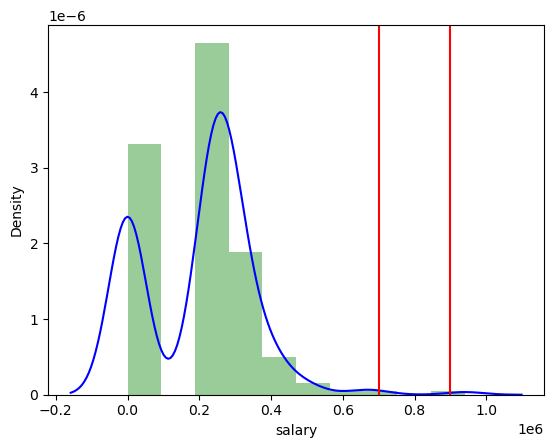

In [28]:
get_pdf_probability(dataset["salary"],700000,900000)

### 11) Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [29]:
import scipy.stats as stats
sci_tech_data = dataset[dataset['degree_t'] == 'Sci&Tech']

etest_p_sci_tech = sci_tech_data['etest_p']
mba_p_sci_tech = sci_tech_data['mba_p']

t_stat, p_value = stats.ttest_ind(etest_p_sci_tech, mba_p_sci_tech)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference 1  between etest_p and mba_p for Sci&Tech students.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between etest_p and mba_p for Sci&Tech students.")

Reject the null hypothesis: There is a significant difference 1  between etest_p and mba_p for Sci&Tech students.


#### This indicates that the t-test found a statistically significant difference between the average entrance test scores (etest_p) and the average MBA scores (mba_p) for students with a Science & Technology degree.


### 12) Which parameter is highly correlated with salary?

In [30]:
import pandas as pd
correlation_with_salary =numeric_data.corr()['salary'].sort_values(ascending=False)
print(correlation_with_salary)

salary      1.000000
ssc_p       0.538090
hsc_p       0.452569
degree_p    0.408371
etest_p     0.186988
mba_p       0.139823
sl_no       0.002543
Name: salary, dtype: float64


#### A correlation coefficient of 0.538090 indicates a moderate positive correlation between ssc_p and salary. This means that, in general, candidates with higher Senior Secondary scores tend to have higher salaries.

### 13) plot any useful graph and explain it.

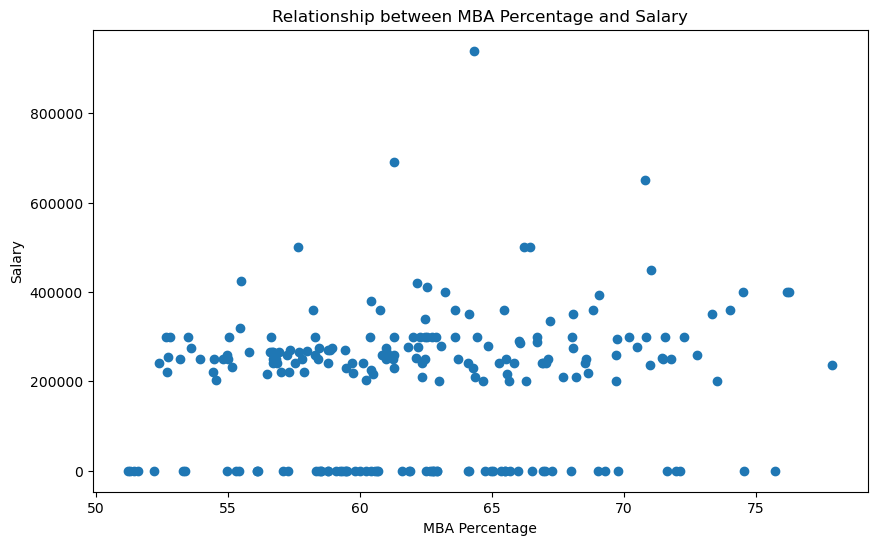

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dataset['mba_p'], dataset['salary'])
plt.xlabel('MBA Percentage')
plt.ylabel('Salary')
plt.title('Relationship between MBA Percentage and Salary')
plt.show()

#### There seems to be a slight positive trend. As MBA Percentage increases, there's a tendency for salaries to increase as well.
#### The points are quite scattered, indicating that MBA Percentage alone doesn't explain a significant portion of the variation in salaries. There are many instances where individuals with similar MBA percentages have vastly different salaries.